## 1. Importação dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carrega os conjuntos de dados de treino, teste e submissão:

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

print(train_data.head())
print(test_data.head())


   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     

## 2. Limpeza e Tratamento de Valores Nulos

### Análise Inicial do Dataset

Verifica a estrutura do dataset, o tipo de dados em cada coluna e a presença de valores nulos.

In [3]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

### Tratamento de valores nulos:
 Identificar colunas com valores ausentes

In [4]:
print(train_data.isnull().sum())

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


## 3. Codificação de Variáveis Categóricas
Para variáveis categóricas, aplicamos técnicas de One-Hot Encoding, convertendo variáveis categóricas em variáveis numéricas.

### Identificação de Colunas Categóricas

In [5]:
# Verificar colunas categóricas com tipo 'object'
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(f'Colunas categóricas: {list(categorical_columns)}')

numeric_columns = train_data.select_dtypes(include=['number']).columns
print(f'Colunas numericas: {list(numeric_columns)}')

Colunas categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
Colunas numericas: ['track_unique_id', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity_target']


### Verificação dos Valores Únicos das Colunas Categóricas

In [6]:
for col in categorical_columns:
    unique_count = train_data[col].nunique()
    print(f'{col} - Número de valores únicos: {unique_count}')

track_id - Número de valores únicos: 66720
artists - Número de valores únicos: 25775
album_name - Número de valores únicos: 37315
track_name - Número de valores únicos: 55767
track_genre - Número de valores únicos: 114


In [7]:
unique_genres = train_data['track_genre'].unique()
print(unique_genres)

['goth' 'opera' 'idm' 'classical' 'techno' 'pop' 'acoustic' 'study'
 'trance' 'progressive-house' 'dance' 'forro' 'mpb' 'emo' 'kids' 'dubstep'
 'dancehall' 'rockabilly' 'children' 'cantopop' 'indie-pop' 'rock-n-roll'
 'punk' 'black-metal' 'pop-film' 'club' 'heavy-metal' 'hardcore' 'swedish'
 'chill' 'r-n-b' 'power-pop' 'trip-hop' 'piano' 'hip-hop' 'funk' 'rock'
 'hardstyle' 'j-dance' 'country' 'german' 'garage' 'malay' 'deep-house'
 'folk' 'death-metal' 'disney' 'hard-rock' 'disco' 'indian' 'pagode'
 'brazil' 'minimal-techno' 'punk-rock' 'bluegrass' 'indie' 'spanish'
 'gospel' 'sleep' 'new-age' 'sertanejo' 'psych-rock' 'j-rock' 'reggaeton'
 'guitar' 'alternative' 'breakbeat' 'latino' 'synth-pop' 'electronic'
 'sad' 'alt-rock' 'songwriter' 'party' 'reggae' 'detroit-techno' 'salsa'
 'dub' 'british' 'samba' 'blues' 'happy' 'grindcore' 'french' 'k-pop'
 'metalcore' 'honky-tonk' 'industrial' 'ska' 'metal' 'groove'
 'chicago-house' 'iranian' 'drum-and-bass' 'show-tunes' 'romance'
 'ambient' 

### Exclusão de variáveis categóricas que não possuem influencia lógica na popularidade da música

In [8]:
columns_to_drop = ['track_id', 'track_name', 'album_name']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

train_data.head()

,track_unique_id,artists,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,Love and Rockets,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,Filippa Giordano,196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,Susumu Yokota,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,Franz Liszt;YUNDI,218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,Scooter,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


## 4. Exploração e Visualização dos Dados
### Distribuição das Features Numéricas

Explora a distribuição das variáveis numéricas usando histogramas e boxplots.

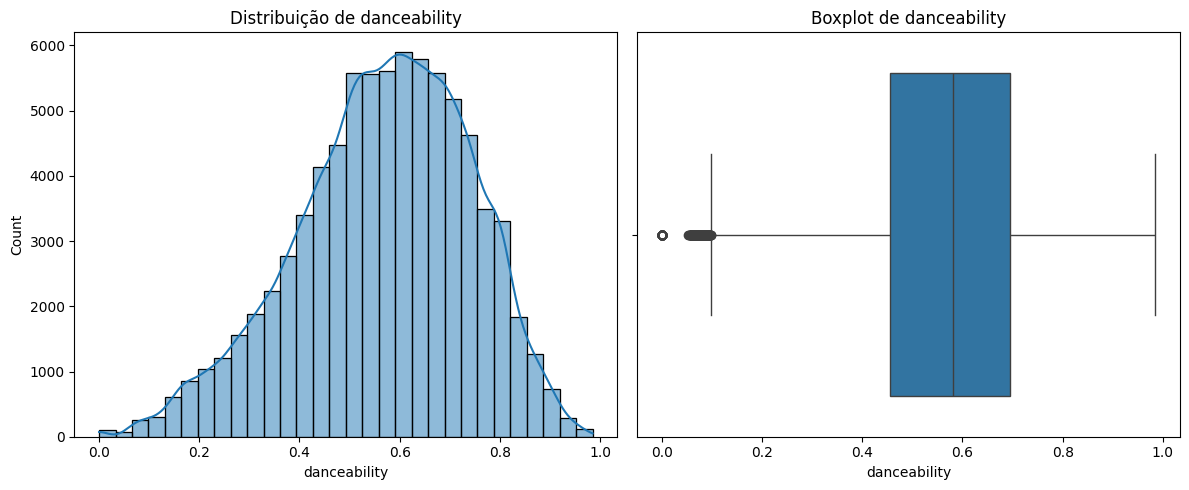

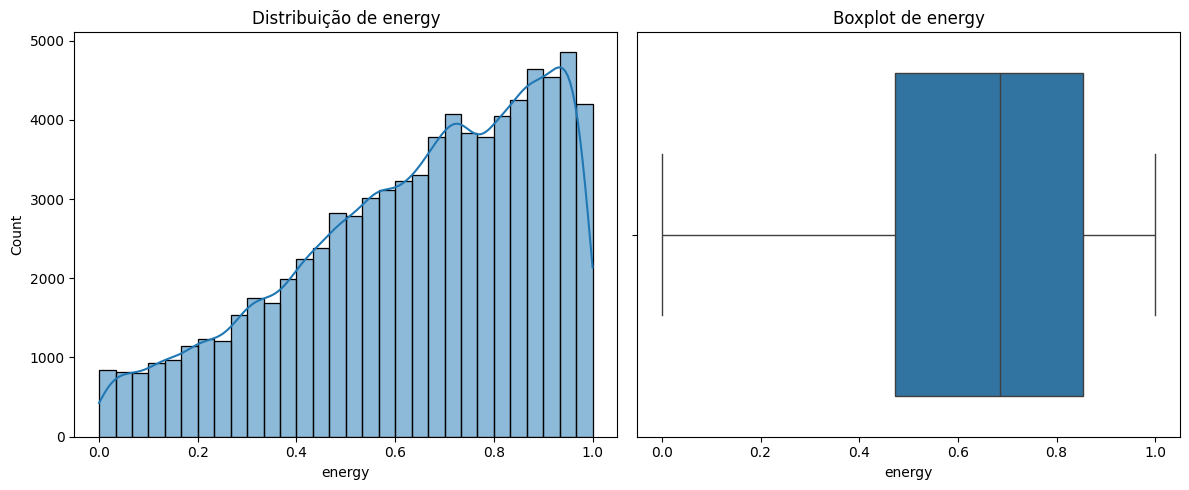

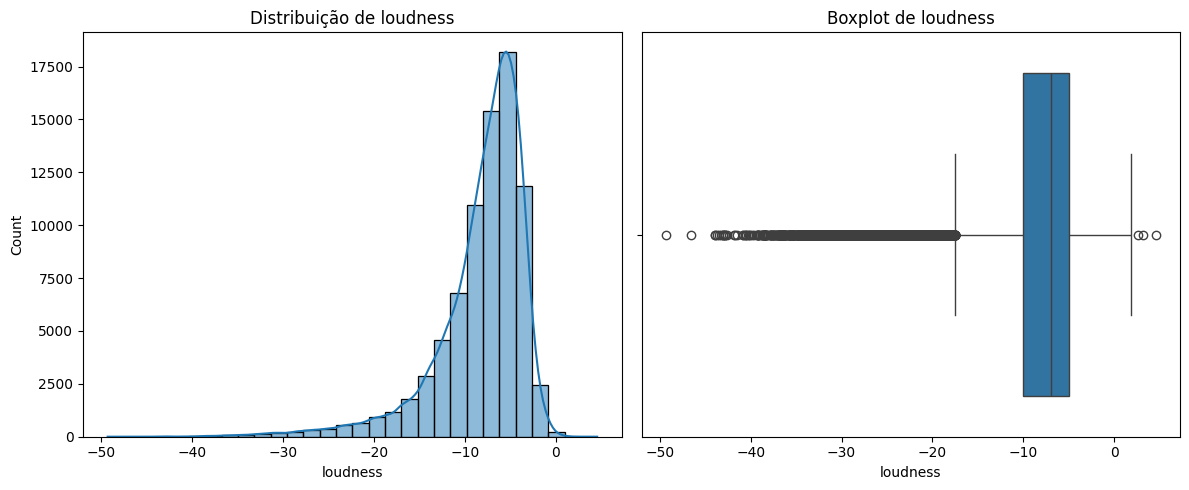

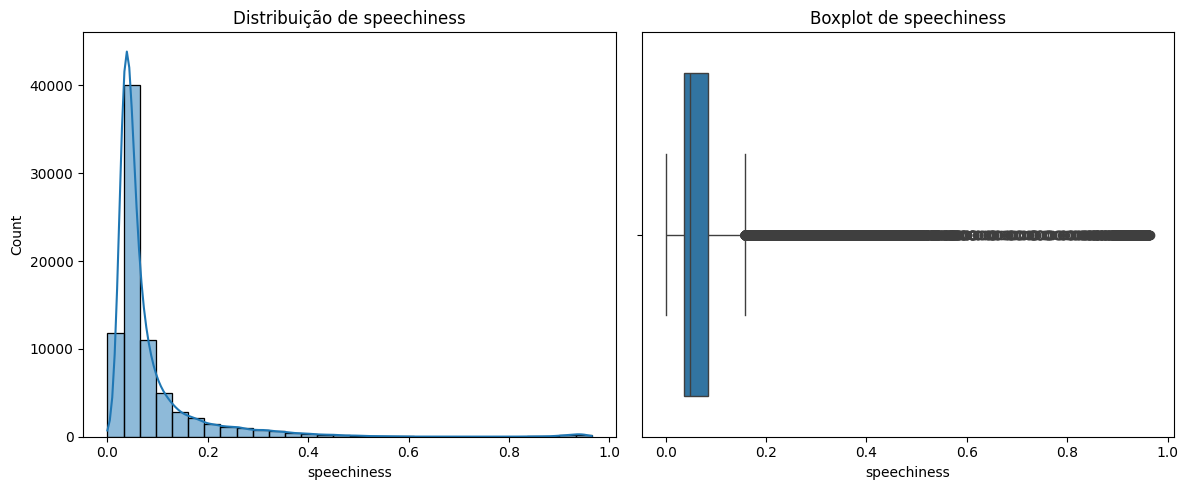

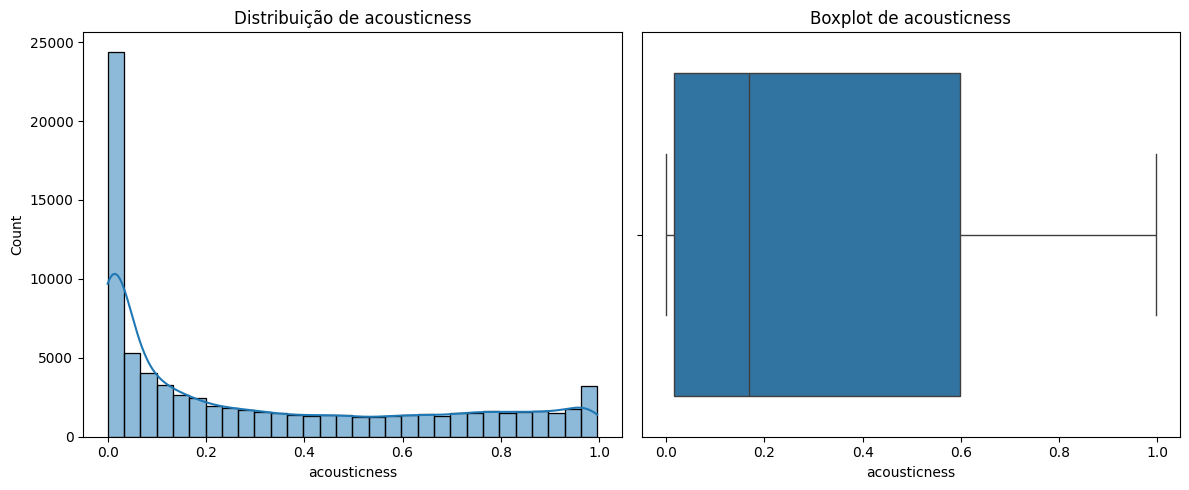

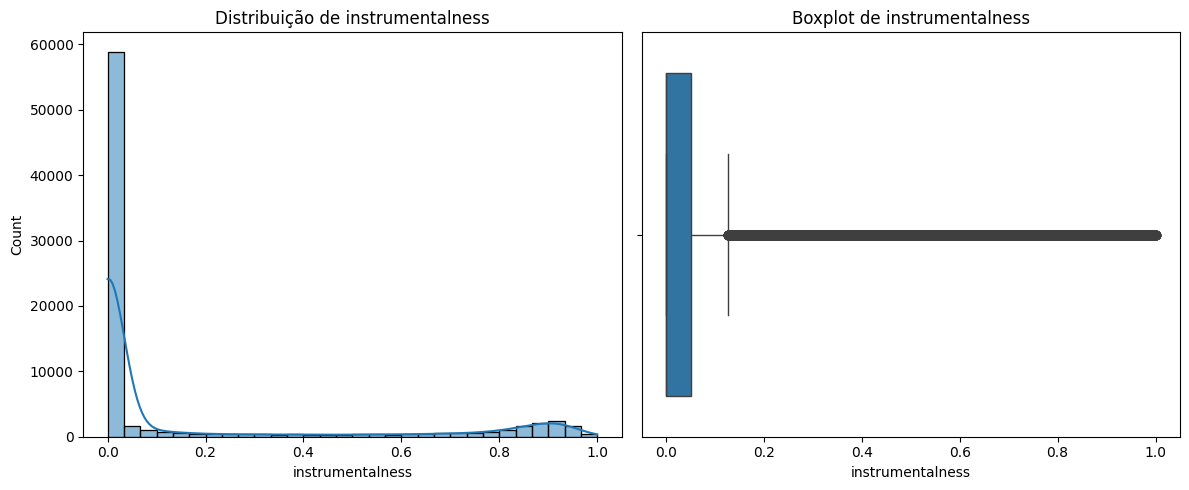

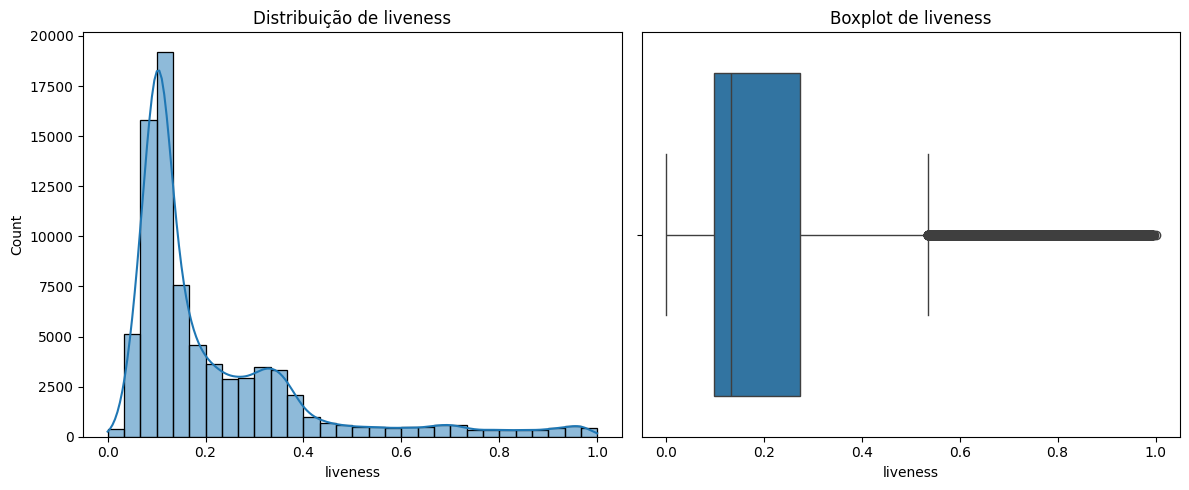

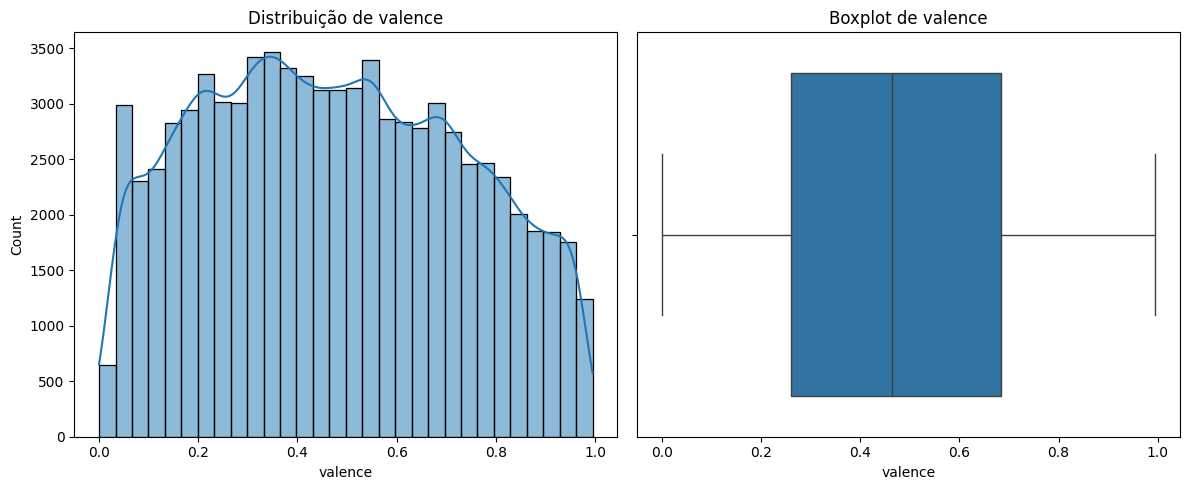

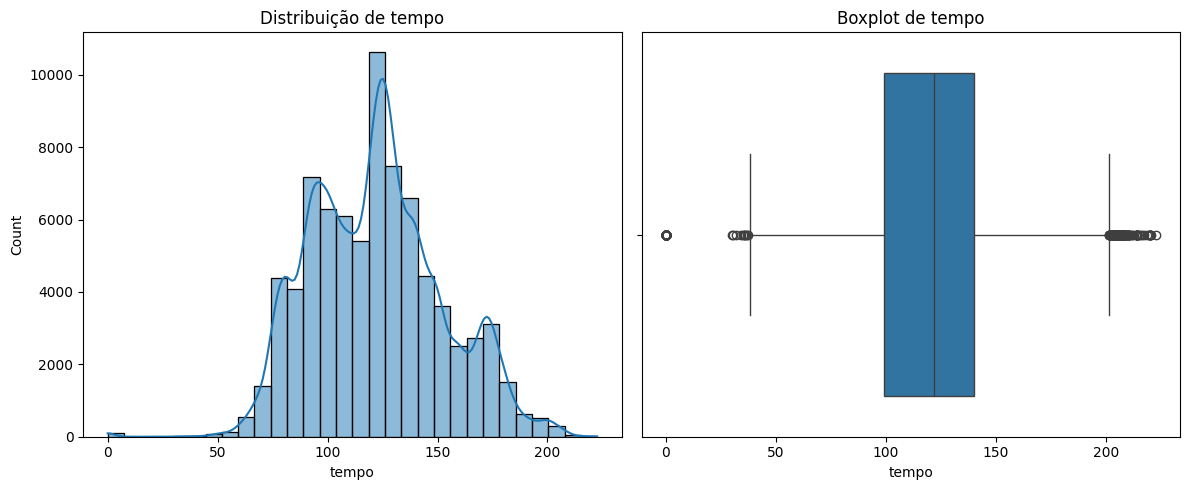

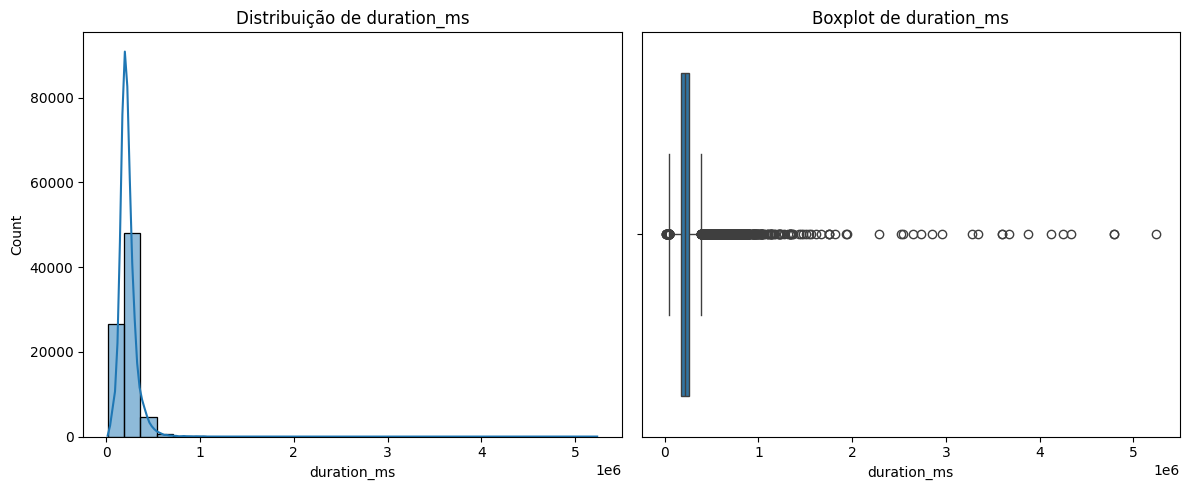

In [9]:
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence',
                    'tempo', 'duration_ms']

for feature in numeric_features:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f'Distribuição de {feature}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=train_data[feature])
    plt.title(f'Boxplot de {feature}')
    
    plt.tight_layout()
    plt.show()

In [10]:
train_data['tempo'].describe()

count    79800.000000
mean       122.076559
std         29.941937
min          0.000000
25%         99.081250
50%        122.009000
75%        140.054000
max        222.605000
Name: tempo, dtype: float64

### Agrupamento de Gêneros Musicais

Verifica a média da popularidade por gênero

In [11]:
# Calcular a popularidade média por gênero
average_popularity_by_genre = train_data.groupby('track_genre')['popularity_target'].mean()

# Listar gêneros com popularidade média baixa
low_popularity_genres = average_popularity_by_genre[average_popularity_by_genre < 0.3]

# Printar os gêneros com baixa / alta popularidade média
print("Gêneros com popularidade média baixa:")
print(low_popularity_genres.sort_values())

Gêneros com popularidade média baixa:
track_genre
romance           0.000000
iranian           0.000000
tango             0.005764
grindcore         0.015015
detroit-techno    0.039886
kids              0.049296
chicago-house     0.050992
party             0.059435
comedy            0.062059
honky-tonk        0.073171
bluegrass         0.074392
happy             0.089489
idm               0.095745
j-idol            0.098571
heavy-metal       0.102384
salsa             0.105409
classical         0.108883
latin             0.121951
black-metal       0.138032
power-pop         0.142229
afrobeat          0.143670
opera             0.177465
breakbeat         0.183217
disney            0.184286
j-dance           0.186589
goth              0.197917
hardstyle         0.206009
drum-and-bass     0.255014
show-tunes        0.269795
malay             0.273392
rock              0.274566
new-age           0.276353
jazz              0.277037
guitar            0.287921
dance             0.289773
indus

In [12]:
pd.set_option('display.max_rows', None)

high_popularity_genres = average_popularity_by_genre[average_popularity_by_genre >= 0.3]

print("Gêneros com popularidade média alta:")
print(high_popularity_genres.sort_values())

Gêneros com popularidade média alta:
track_genre
rockabilly           0.300435
study                0.311978
rock-n-roll          0.334302
reggae               0.339007
death-metal          0.342736
hardcore             0.350000
alternative          0.356436
reggaeton            0.370580
spanish              0.389535
disco                0.392958
latino               0.418605
dancehall            0.422965
german               0.473988
cantopop             0.474964
blues                0.479351
sleep                0.479651
trip-hop             0.491573
synth-pop            0.493653
children             0.499283
garage               0.500000
house                0.503737
french               0.515108
ska                  0.530000
edm                  0.532189
electro              0.533237
club                 0.551136
hip-hop              0.555398
minimal-techno       0.557143
groove               0.571429
j-rock               0.584286
alt-rock             0.592431
singer-songwriter    

Agrupamos os gêneros musicais em categorias maiores para facilitar a modelagem. Gêneros com média da popularidade menor que 3 são agrupados no grupo "Outros"

In [13]:
# Dicionário para agrupar os gêneros em categorias maiores, corrigido para evitar duplicidade
genre_map = {
    # Pop
    'pop': 'Pop',
    'indie-pop': 'Pop',
    'pop-film': 'Pop',
    'j-pop': 'Pop',
    'sad': 'Pop',
    'k-pop': 'Pop',
    'swedish': 'Pop',

    # Rock/Metal
    'hard-rock': 'Rock/Metal',
    'punk-rock': 'Rock/Metal',
    'psych-rock': 'Rock/Metal',
    'alt-rock': 'Rock/Metal',
    'emo': 'Rock/Metal',
    'grunge': 'Rock/Metal',
    'metalcore': 'Rock/Metal',
    'punk': 'Rock/Metal',
    'j-rock': 'Rock/Metal',
    'metal': 'Rock/Metal',
    'punk': 'Rock/Metal',
    'hardcore': 'Rock/Metal',
    'death-metal': 'Rock/Metal',

    # Eletrônica
    'edm': 'Eletrônica',
    'techno': 'Eletrônica',
    'house': 'Eletrônica',
    'minimal-techno': 'Eletrônica',
    'deep-house': 'Eletrônica',
    'progressive-house': 'Eletrônica',
    'electronic': 'Eletrônica',
    'dubstep': 'Eletrônica',
    'club': 'Eletrônica',
    'electro': 'Eletrônica',
    'trance': 'Eletrônica',
    'garage': 'Eletrônica',
    'ambient': 'Eletrônica',
    'chill': 'Eletrônica',

    # Hip-Hop/Funk
    'hip-hop': 'Hip-Hop/Funk',
    'rap': 'Hip-Hop/Funk',
    'trap': 'Hip-Hop/Funk',
    'funk': 'Hip-Hop/Funk',
    'r-n-b': 'Hip-Hop/Funk',
    'groove': 'Hip-Hop/Funk',

    # Reggae e Derivados
    'reggae': 'Reggae e Derivados',
    'dub': 'Reggae e Derivados',
    'ska': 'Reggae e Derivados',

    # Música Brasileira
    'mpb': 'Música Brasileira',
    'pagode': 'Música Brasileira',
    'forro': 'Música Brasileira',
    'brazil': 'Música Brasileira',
    'samba': 'Música Brasileira',
    'sertanejo': 'Música Brasileira',

    # Folk/Acústico
    'folk': 'Folk/Acústico',
    'acoustic': 'Folk/Acústico',
    'piano': 'Folk/Acústico',
    'singer-songwriter': 'Folk/Acústico',
    'songwriter': 'Folk/Acústico',

    # Gêneros Asiáticos
    'mandopop': 'Gêneros Asiáticos',
    'anime': 'Gêneros Asiáticos',

    # Outros Gêneros com Alta Popularidade
    'indie': 'Indie',
    'blues': 'Blues',
    'jazz': 'Jazz',
    'disco': 'Disco',
    'latin': 'Latin',
    'reggaeton': 'Reggaeton',
    'spanish': 'Spanish',
    'gospel': 'Gospel',
    'world-music': 'World Music',
    'ambient': 'Ambient',
    'trip-hop': 'Trip-Hop',
    'synth-pop': 'Synth-Pop',
    'indian': 'Indian',
    'turkish': 'Turkish',
    'french': 'French',
    'german': 'German',
    'british': 'British',
    'alternative': 'Alternative',
}


# Aplicar o mapeamento ao dataset de treino e teste
train_data['track_genre_grouped'] = train_data['track_genre'].map(genre_map).fillna('Outros')
test_data['track_genre_grouped'] = test_data['track_genre'].map(genre_map).fillna('Outros')

# Verificando os grupos criados
print(train_data['track_genre_grouped'].value_counts())

track_genre_grouped
Outros                30664
Eletrônica             9114
Rock/Metal             8430
Pop                    4928
Música Brasileira      4221
Folk/Acústico          3521
Hip-Hop/Funk           2787
Reggae e Derivados     2103
Gêneros Asiáticos      1421
World Music             729
Ambient                 725
Trip-Hop                712
Disco                   710
Synth-Pop               709
Turkish                 709
Gospel                  708
Alternative             707
Reggaeton               707
Indian                  706
Latin                   697
French                  695
German                  692
Spanish                 688
British                 683
Indie                   681
Blues                   678
Jazz                    675
Name: count, dtype: int64


### Aplicação de One-Hot Encoding

In [14]:
# Aplicar One-Hot Encoding para a coluna 'track_genre_grouped'
train_data = pd.get_dummies(train_data, columns=['track_genre_grouped'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['track_genre_grouped'], drop_first=True)

train_data.head()

,track_unique_id,artists,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,track_genre_grouped_Outros,track_genre_grouped_Pop,track_genre_grouped_Reggae e Derivados,track_genre_grouped_Reggaeton,track_genre_grouped_Rock/Metal,track_genre_grouped_Spanish,track_genre_grouped_Synth-Pop,track_genre_grouped_Trip-Hop,track_genre_grouped_Turkish,track_genre_grouped_World Music
0,41996,Love and Rockets,211533,False,0.305,0.8490,9,-10.795,1,0.0549,...,True,False,False,False,False,False,False,False,False,False
1,76471,Filippa Giordano,196000,False,0.287,0.1900,7,-12.030,0,0.0370,...,True,False,False,False,False,False,False,False,False,False
2,54809,Susumu Yokota,216506,False,0.583,0.5090,1,-9.661,1,0.0362,...,True,False,False,False,False,False,False,False,False,False
3,16326,Franz Liszt;YUNDI,218346,False,0.163,0.0368,8,-23.149,1,0.0472,...,True,False,False,False,False,False,False,False,False,False
4,109799,Scooter,173160,False,0.647,0.9210,2,-7.294,1,0.1850,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Filtrar as colunas relacionadas aos gêneros agrupados
genre_columns = [col for col in train_data.columns if 'track_genre_grouped_' in col]

# Converter as colunas de One-Hot Encoding para valores numéricos 0 e 1
train_data[genre_columns] = train_data[genre_columns].astype(int)
test_data[genre_columns] = test_data[genre_columns].astype(int)

train_data['explicit'] = train_data['explicit'].astype(int)
test_data['explicit'] = test_data['explicit'].astype(int)

print(train_data.dtypes)


track_unique_id                             int64
artists                                    object
duration_ms                                 int64
explicit                                    int32
danceability                              float64
energy                                    float64
key                                         int64
loudness                                  float64
mode                                        int64
speechiness                               float64
acousticness                              float64
instrumentalness                          float64
liveness                                  float64
valence                                   float64
tempo                                     float64
time_signature                              int64
track_genre                                object
popularity_target                           int64
track_genre_grouped_Ambient                 int32
track_genre_grouped_Blues                   int32


In [16]:
train_data.head()

,track_unique_id,artists,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,track_genre_grouped_Outros,track_genre_grouped_Pop,track_genre_grouped_Reggae e Derivados,track_genre_grouped_Reggaeton,track_genre_grouped_Rock/Metal,track_genre_grouped_Spanish,track_genre_grouped_Synth-Pop,track_genre_grouped_Trip-Hop,track_genre_grouped_Turkish,track_genre_grouped_World Music
0,41996,Love and Rockets,211533,0,0.305,0.8490,9,-10.795,1,0.0549,...,1,0,0,0,0,0,0,0,0,0
1,76471,Filippa Giordano,196000,0,0.287,0.1900,7,-12.030,0,0.0370,...,1,0,0,0,0,0,0,0,0,0
2,54809,Susumu Yokota,216506,0,0.583,0.5090,1,-9.661,1,0.0362,...,1,0,0,0,0,0,0,0,0,0
3,16326,Franz Liszt;YUNDI,218346,0,0.163,0.0368,8,-23.149,1,0.0472,...,1,0,0,0,0,0,0,0,0,0
4,109799,Scooter,173160,0,0.647,0.9210,2,-7.294,1,0.1850,...,0,0,0,0,0,0,0,0,0,0


## 5. Formulação de Hipóteses
### Hipótese 1: Gêneros musicais influenciam diretamente a popularidade

Verificamos se músicas de gêneros como Música Brasileira, Pop ou Hip-Hop têm maior chance de ser populares.

#### Correlação Entre Gêneros e Popularidade

Calcula a correlação entre os gêneros musicais e a variável de destino (popularity_target), a fim de descobrir padrões que possam influenciar a popularidade das músicas.

In [17]:
# Calcular a correlação apenas entre popularity_target e as colunas de gêneros
correlation_matrix = train_data[['popularity_target'] + list(genre_columns)].corr()

# Filtrar as correlações da coluna 'popularity_target' com os gêneros agrupados
popularity_correlation = correlation_matrix['popularity_target'].drop('popularity_target')

# Exibir as correlações em ordem decrescente
print(popularity_correlation.sort_values(ascending=False))

track_genre_grouped_Música Brasileira     0.223883
track_genre_grouped_Pop                   0.165798
track_genre_grouped_Eletrônica            0.124440
track_genre_grouped_Rock/Metal            0.099625
track_genre_grouped_Gospel                0.095070
track_genre_grouped_Gêneros Asiáticos     0.093413
track_genre_grouped_Turkish               0.091400
track_genre_grouped_Indian                0.090110
track_genre_grouped_Folk/Acústico         0.071938
track_genre_grouped_World Music           0.056221
track_genre_grouped_Ambient               0.055569
track_genre_grouped_Hip-Hop/Funk          0.054947
track_genre_grouped_British               0.040225
track_genre_grouped_Indie                 0.027739
track_genre_grouped_Reggae e Derivados    0.010026
track_genre_grouped_French                0.005112
track_genre_grouped_Synth-Pop             0.001100
track_genre_grouped_Trip-Hop              0.000708
track_genre_grouped_Blues                -0.001573
track_genre_grouped_German     

C:\Users\paiva\AppData\Local\Temp\ipykernel_18912\3944325840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')


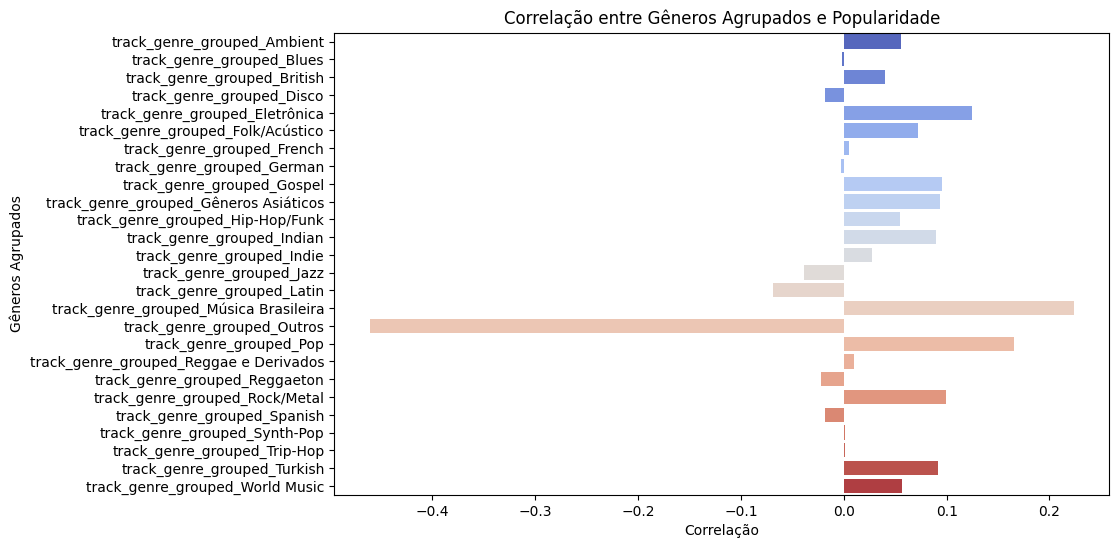

In [18]:
# Criar um gráfico de barras para visualização das correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')
plt.title('Correlação entre Gêneros Agrupados e Popularidade')
plt.xlabel('Correlação')
plt.ylabel('Gêneros Agrupados')
plt.show()

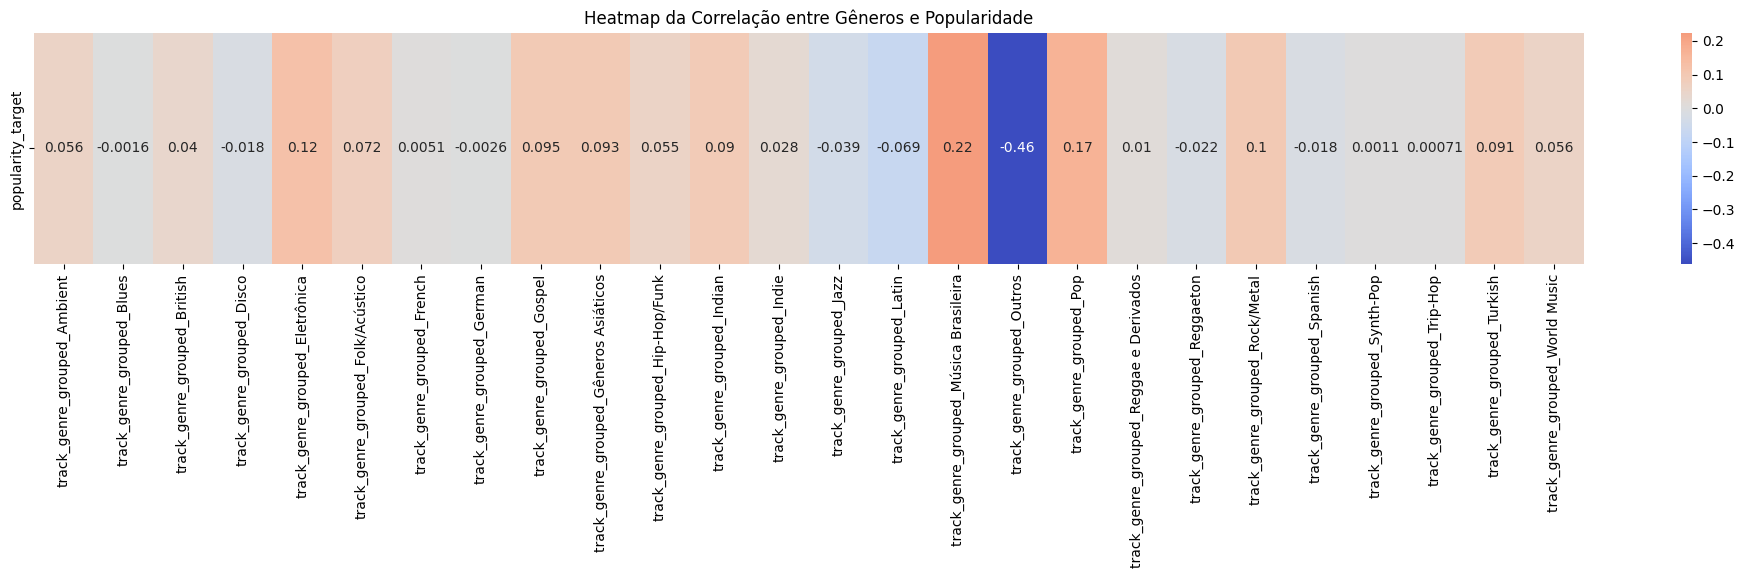

In [19]:
# Criar um heatmap para visualização das correlações
plt.figure(figsize=(25, 3))
sns.heatmap(popularity_correlation.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap da Correlação entre Gêneros e Popularidade')
plt.show()

### Hipótese 2: Músicas com maior acusticidade têm maior chance de ser populares

Músicas com maior valor de acousticness tendem a ser mais populares, pois são mais animadas e atraentes para o público.

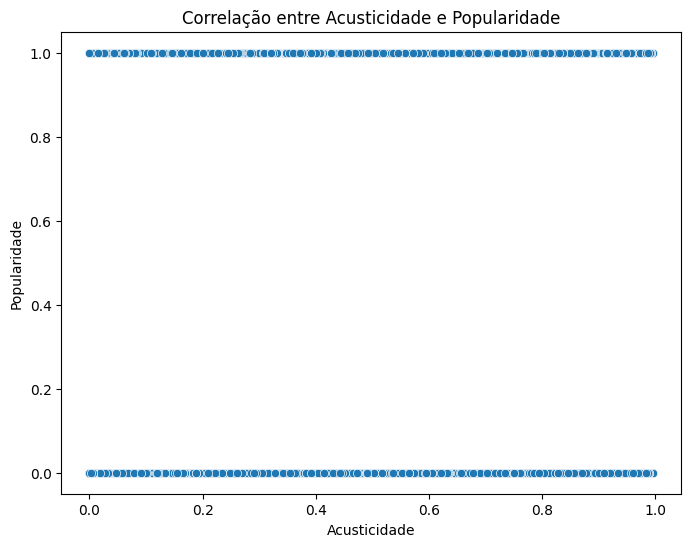

In [20]:
acousticness_popularity = train_data[['acousticness', 'popularity_target']].corr().iloc[0, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='popularity_target', data=train_data)
plt.title('Correlação entre Acusticidade e Popularidade')
plt.xlabel('Acusticidade')
plt.ylabel('Popularidade')
plt.show()

### Hipótese 3: Músicas mais curtas são mais populares

Como o tempo de atenção do público moderno é menor, acreditamos que músicas com menor duração têm maior chance de serem populares.

In [21]:
artists_popularity = train_data.groupby('artists')['popularity_target'].mean().reset_index()

artists_popularity = artists_popularity.rename(columns={'popularity_target': 'artist_mean_popularity'})

def categorical_popularity(mean_popularity):
    if mean_popularity > 0.6:
        return 'Muito Popular'
    elif mean_popularity >=0.4:
        return 'Popular'
    else:
        return 'Pouco Popular'

artists_popularity['artist_popularity_group'] = artists_popularity['artist_mean_popularity'].apply(categorical_popularity)

print(artists_popularity.head())
# Verificar a distribuição dos grupos de popularidade dos artistas
print(artists_popularity['artist_popularity_group'].value_counts())


                           artists  artist_mean_popularity  \
0                           !nvite                     0.5   
1            "Puppy Dog Pals" Cast                     1.0   
2              "Weird Al" Yankovic                     0.1   
3                  $affie;lofi stu                     1.0   
4  &ME;Rampa;Adam Port;Sofie Royer                     1.0   

  artist_popularity_group  
0                 Popular  
1           Muito Popular  
2           Pouco Popular  
3           Muito Popular  
4           Muito Popular  
artist_popularity_group
Muito Popular    13505
Pouco Popular    11473
Popular            797
Name: count, dtype: int64


In [22]:
train_data = train_data.merge(artists_popularity[['artists', 'artist_popularity_group']], on='artists', how='left')
test_data = test_data.merge(artists_popularity[['artists', 'artist_popularity_group']], on='artists', how='left')

print(train_data[['artists', 'artist_popularity_group']].head())

             artists artist_popularity_group
0   Love and Rockets           Pouco Popular
1   Filippa Giordano           Pouco Popular
2      Susumu Yokota           Pouco Popular
3  Franz Liszt;YUNDI           Pouco Popular
4            Scooter           Pouco Popular


In [23]:
# Aplicar One-Hot Encoding para a coluna 'artist_popularity_group'
train_data = pd.get_dummies(train_data, columns=['artist_popularity_group'], drop_first=False)
test_data = pd.get_dummies(test_data, columns=['artist_popularity_group'], drop_first=False)

artist_columns = [col for col in train_data.columns if 'artist_popularity_group_' in col]

train_data[artist_columns] = train_data[artist_columns].astype(int)
test_data[artist_columns] = test_data[artist_columns].astype(int)

# Verificar os dados após o One-Hot Encoding
print(train_data.head())

   track_unique_id            artists  duration_ms  explicit  danceability  \
0            41996   Love and Rockets       211533         0         0.305   
1            76471   Filippa Giordano       196000         0         0.287   
2            54809      Susumu Yokota       216506         0         0.583   
3            16326  Franz Liszt;YUNDI       218346         0         0.163   
4           109799            Scooter       173160         0         0.647   

   energy  key  loudness  mode  speechiness  ...  \
0  0.8490    9   -10.795     1       0.0549  ...   
1  0.1900    7   -12.030     0       0.0370  ...   
2  0.5090    1    -9.661     1       0.0362  ...   
3  0.0368    8   -23.149     1       0.0472  ...   
4  0.9210    2    -7.294     1       0.1850  ...   

   track_genre_grouped_Reggaeton  track_genre_grouped_Rock/Metal  \
0                              0                               0   
1                              0                               0   
2             

artist_popularity_group_Muito Popular    0.840282
artist_popularity_group_Popular          0.004780
artist_popularity_group_Pouco Popular   -0.837771
Name: popularity_target, dtype: float64


C:\Users\paiva\AppData\Local\Temp\ipykernel_18912\2952773336.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')


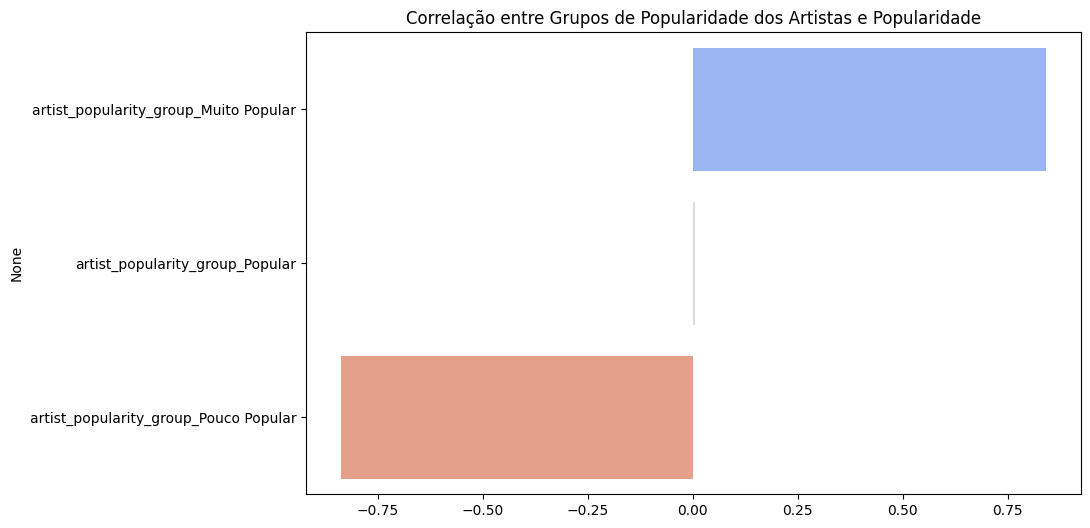

In [24]:
# Calcular a correlação entre os grupos de popularidade dos artistas e a popularidade no dataset de treino
correlation_matrix = train_data[['popularity_target'] + artist_columns].corr()

# Filtrar a correlação da coluna 'popularity_target'
popularity_correlation = correlation_matrix['popularity_target'].drop('popularity_target')

# Exibir as correlações em ordem decrescente
print(popularity_correlation.sort_values(ascending=False))

# Visualizar a correlação usando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')
plt.title('Correlação entre Grupos de Popularidade dos Artistas e Popularidade')
plt.show()


### Padronização dos dados
As variáveis numéricas foram escalonadas usando StandardScaler.

In [25]:
train_data['duration_min'] = train_data['duration_ms'] / 60000
test_data['duration_min'] = test_data['duration_ms'] / 60000

# Remover a coluna original
train_data = train_data.drop('duration_ms', axis=1)
test_data = test_data.drop('duration_ms', axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train_data_scaled = train_data.copy()
# test_data_scaled = test_data.copy()

numeric_features = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64'] and col not in ['popularity_target', 'track_unique_id']]
numeric_features.append('explicit')
print(numeric_features)

# Aplicar escalonamento nas variáveis numéricas
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_min', 'explicit']


## 6. Construção do Modelo
### Aplicação de RandomForest para Importância das Features

Usa o RandomForestClassifier para avaliar a importância das features numéricas e categóricas em relação à popularidade.

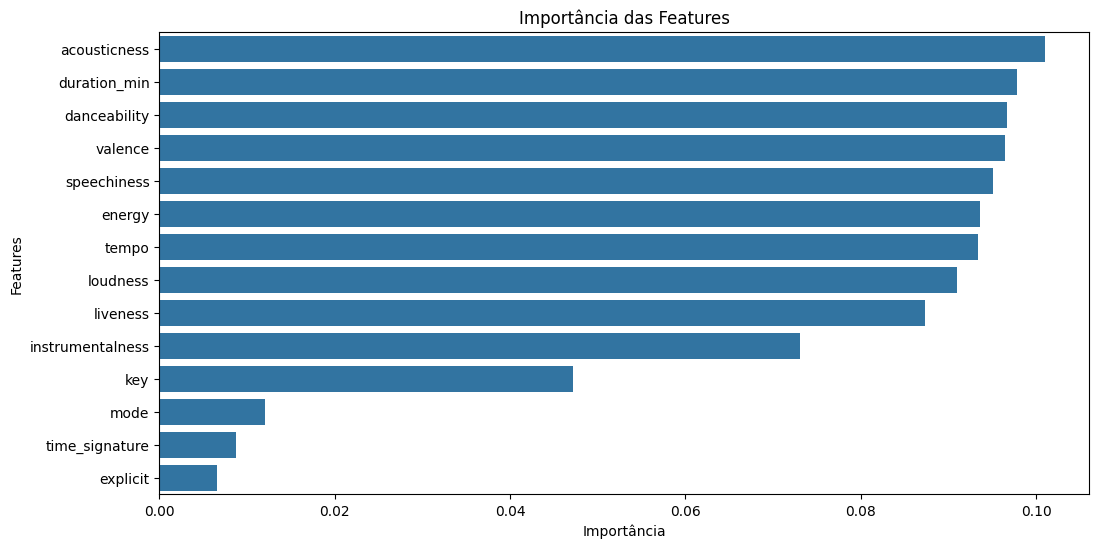

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Separar features e alvo
X = train_data[numeric_features]
y = train_data['popularity_target']

# Treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Importância das features
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plotar
plt.figure(figsize=(12,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

Dropa as colunas numéricas com importância menor que 0.8 

In [28]:
columns_to_drop = ['track_genre', 'liveness', 'time_signature', 'mode', 'key', 'explicit', 'artists']
train_data = train_data.drop(columns=columns_to_drop)
test_data= test_data.drop(columns=columns_to_drop)

train_data.columns

Index(['track_unique_id', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo',
       'popularity_target', 'track_genre_grouped_Ambient',
       'track_genre_grouped_Blues', 'track_genre_grouped_British',
       'track_genre_grouped_Disco', 'track_genre_grouped_Eletrônica',
       'track_genre_grouped_Folk/Acústico', 'track_genre_grouped_French',
       'track_genre_grouped_German', 'track_genre_grouped_Gospel',
       'track_genre_grouped_Gêneros Asiáticos',
       'track_genre_grouped_Hip-Hop/Funk', 'track_genre_grouped_Indian',
       'track_genre_grouped_Indie', 'track_genre_grouped_Jazz',
       'track_genre_grouped_Latin', 'track_genre_grouped_Música Brasileira',
       'track_genre_grouped_Outros', 'track_genre_grouped_Pop',
       'track_genre_grouped_Reggae e Derivados',
       'track_genre_grouped_Reggaeton', 'track_genre_grouped_Rock/Metal',
       'track_genre_grouped_Spanish', 'track_genre_grouped_Synth-Pop',
 

### Construção do Modelo: RandomForestClassifier

Constroi um modelo utilizando o RandomForestClassifier para prever a popularidade das músicas.

In [29]:
from sklearn.ensemble import RandomForestClassifier

X_test = train_data.drop('popularity_target', axis=1)
y_test = train_data['popularity_target']

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com todo o conjunto de treinamento
rf.fit(X_test, y_test)

y_train_pred = rf.predict(X_test)

### Métricas de Avaliação

Calcula as métricas de avaliação para o modelo, incluindo acurácia, precisão, recall e F1-score

In [30]:
# Cálculo das métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_train_pred)
precision = precision_score(y_test, y_train_pred)
recall = recall_score(y_test, y_train_pred)
f1 = f1_score(y_test, y_train_pred)

print("\nMétricas do modelo no conjunto de treinamento:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_train_pred))



Métricas do modelo no conjunto de treinamento:
Acurácia: 0.9999
Precisão: 0.9999
Recall: 0.9999
F1 Score: 0.9999

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40870
           1       1.00      1.00      1.00     38930

    accuracy                           1.00     79800
   macro avg       1.00      1.00      1.00     79800
weighted avg       1.00      1.00      1.00     79800



## 8. Finetuning de Hiperparâmetros

Realiza ajuste fino dos hiperparâmetros do RandomForestClassifier para melhorar o desempenho do modelo.

## 9. Previsões no Conjunto de Teste e Submissão

Aplica o modelo ao conjunto de teste e gera as previsões para submissão.

In [31]:
y_test_pred = rf.predict(test_data)

# Resetar os índices se necessário
test_data = test_data.reset_index(drop=True)
y_test_pred = pd.Series(y_test_pred).reset_index(drop=True)

print(test_data[['track_unique_id']].head())  # Verificar os IDs antes de gerar o arquivo de submissão
print(y_test_pred[:5])  # Verificar as primeiras previsões para garantir o alinhamento

# Criar o arquivo de submissão
submission = pd.DataFrame({
    'track_unique_id': test_data['track_unique_id'],
    'popularity_target': y_test_pred
})

print(f"Número de linhas no conjunto de teste: {len(test_data)}")
print(f"Número de linhas no arquivo de submissão: {len(submission)}")

submission.to_csv('submissionTest.csv', index=False)

   track_unique_id
0           113186
1            42819
2            59311
3            91368
4            61000
0    1
1    0
2    0
3    0
4    0
dtype: int64
Número de linhas no conjunto de teste: 34200
Número de linhas no arquivo de submissão: 34200
